<a href="https://colab.research.google.com/github/asyahdin/Introduction-to-Python/blob/main/EXERCISES_1_EDA_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd


df = pd.read_csv("loan_sanction_train.csv")
df.head(8)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


**Correlation**

In [6]:
df_numeric = df.select_dtypes(include=['number'])


df_numeric.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [7]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

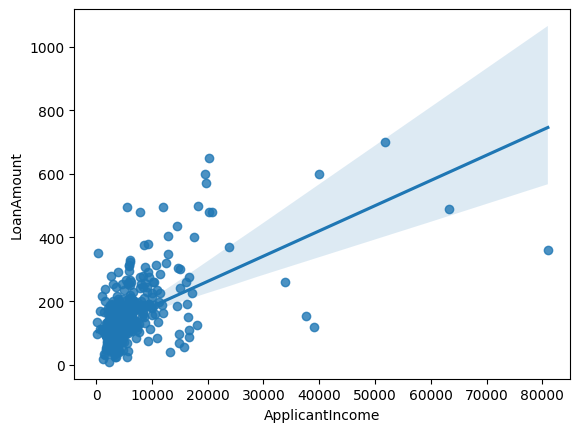

In [8]:
#plot

from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

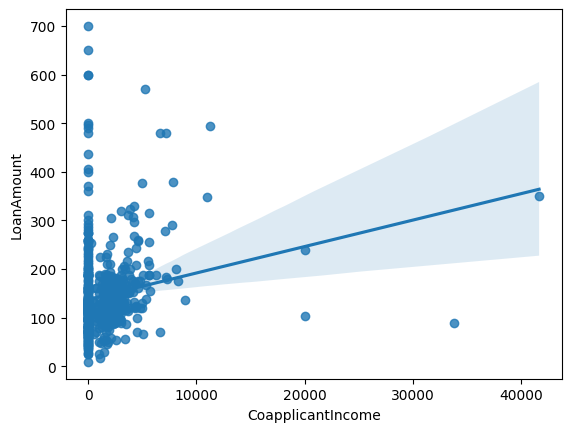

In [9]:
sns.regplot(x='CoapplicantIncome', y='LoanAmount', data=df) #neg corr

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

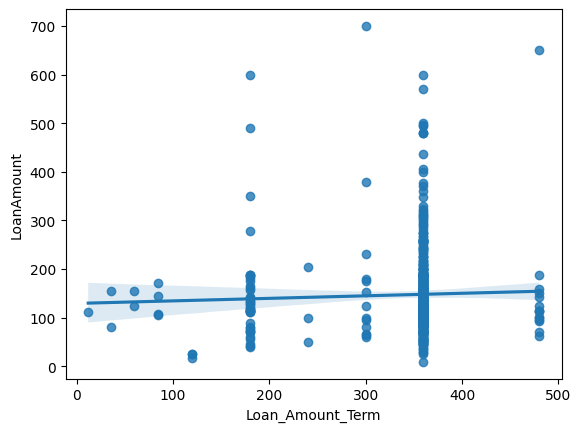

In [10]:
sns.regplot(x='Loan_Amount_Term', y='LoanAmount', data=df)

In [14]:
import scipy.stats as st
#cal corr and value

#strong corr #positve value
correlation, p_value = st.pearsonr(df['ApplicantIncome'], df['LoanAmount'])
print ('The correlation is: ', correlation, 'and the p_value is: ', p_value)

The correlation is:  0.5656204566820269 and the p_value is:  3.2844421970092016e-53


In [15]:
import scipy.stats as st
#cal corr and value

#strong corr #positve value
correlation, p_value = st.pearsonr(df['CoapplicantIncome'], df['LoanAmount'])
print ('The correlation is: ', correlation, 'and the p_value is: ', p_value)

The correlation is:  0.18782839323334405 and the p_value is:  2.779254792343681e-06


In [12]:
df['LoanAmount'].isnull().sum() # to know missing value on stroke why it is NaN

22

In [16]:
import numpy as np # to change storke from NaN to numbers

df['LoanAmount'].replace(np.nan, df['LoanAmount'].mean(), inplace=True) #to change

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

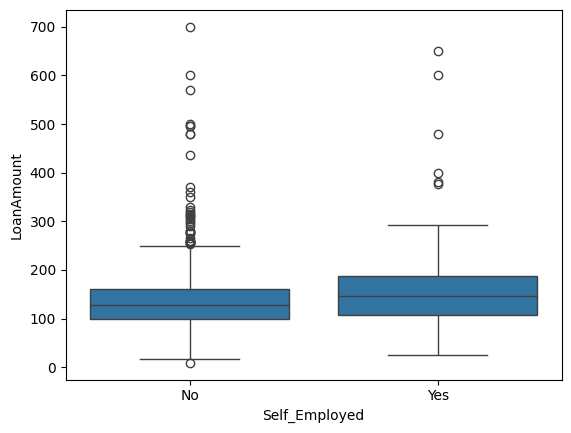

In [17]:
sns.boxplot(x='Self_Employed', y='LoanAmount', data=df) #c features to c numerical feature

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

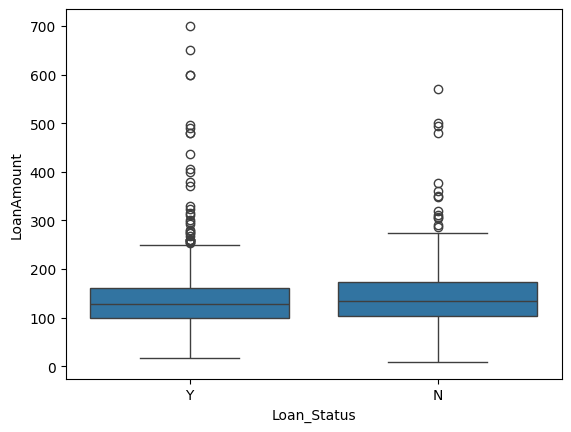

In [18]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df) #c features to c numerical feature

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

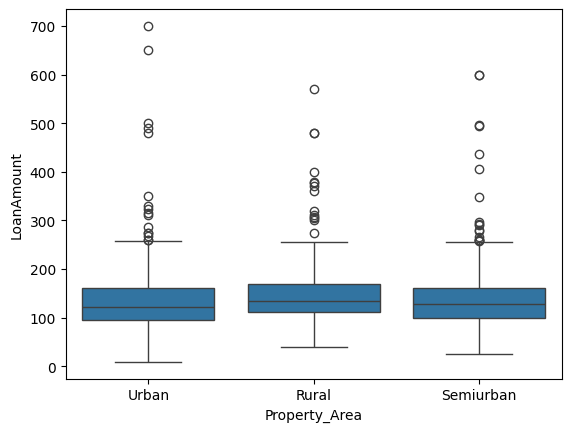

In [19]:
sns.boxplot(x='Property_Area', y='LoanAmount', data=df) #c features to c numerical feature

**Group By**

In [22]:
df1 = df[['Self_Employed', 'Property_Area', 'LoanAmount']]
df1_group = df1.groupby(['Self_Employed', 'Property_Area'], as_index=False).mean(8)
df1_group #group by #can chooose format which one to put index (true/false)

,Self_Employed,Property_Area,LoanAmount
0,No,Rural,148.986439
1,No,Semiurban,144.011709
2,No,Urban,133.416395
3,Yes,Rural,183.900468
4,Yes,Semiurban,154.463260
5,Yes,Urban,179.291667


In [23]:
#conver to table pivot
#mention columns or rows

df1_pivot = df1_group.pivot(index='Property_Area', columns='Self_Employed')
df1_pivot

LoanAmount            
Self_Employed          No         Yes
Property_Area                        
Rural          148.986439  183.900468
Semiurban      144.011709  154.463260
Urban          133.416395  179.291667

<Axes: xlabel='None-Self_Employed', ylabel='Property_Area'>

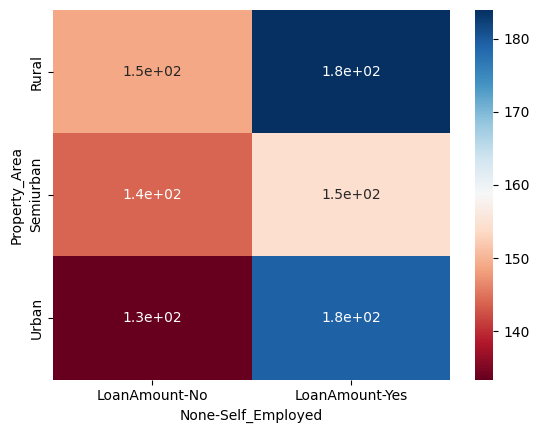

In [24]:
#heatmap

sns.heatmap(df1_pivot, annot=True, cmap='RdBu') #add value

<Axes: >

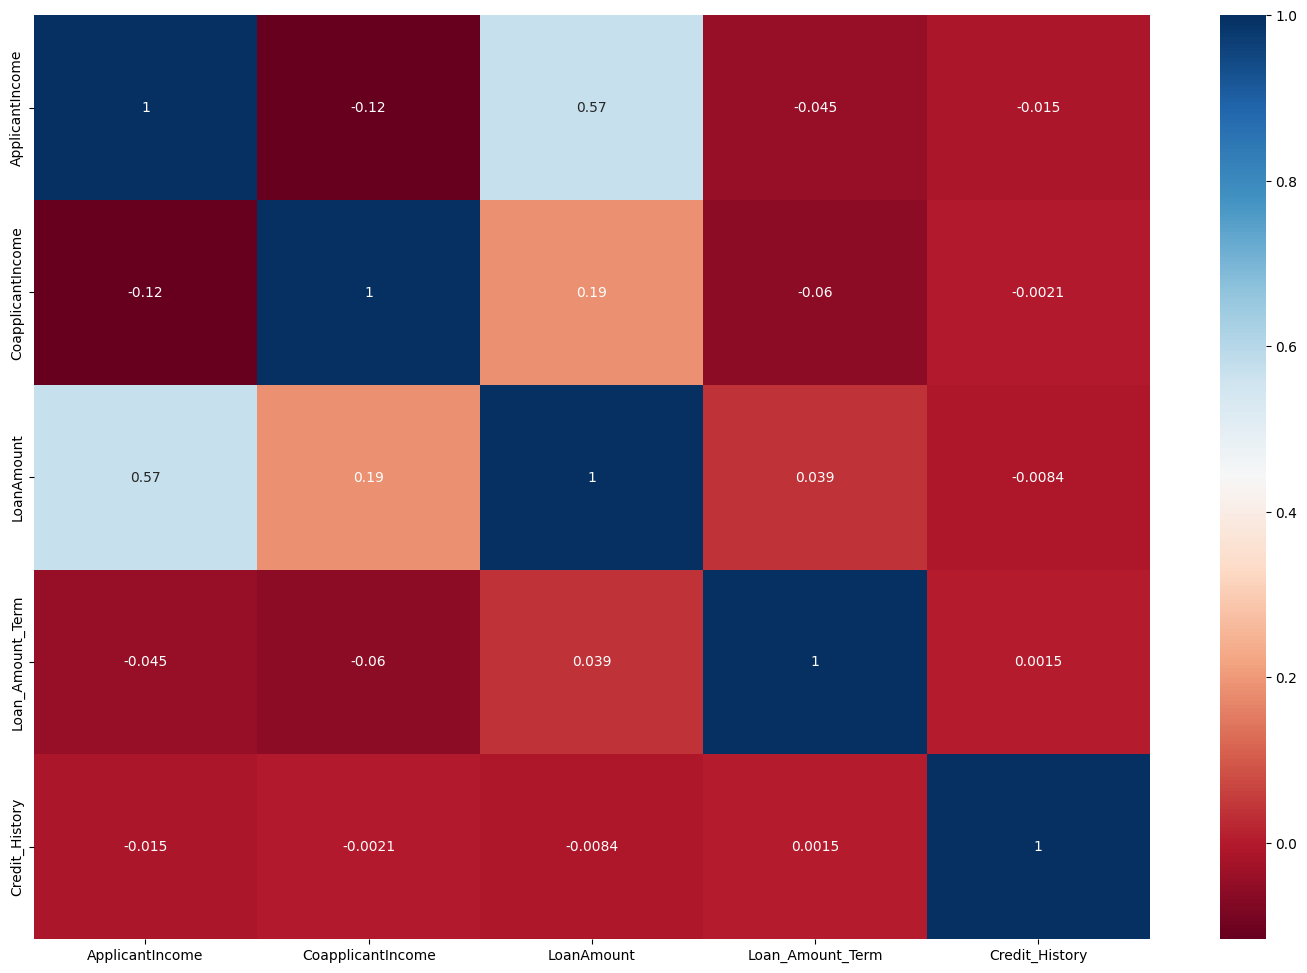

In [25]:
#to find correlation
#numerical features


plt.figure(figsize=(18,12)) #dont put more than 18
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu') #add value

In [31]:
df2 = df[['Gender', 'Married', 'LoanAmount']]
df2_group = df2.groupby(['Gender', 'Married'], as_index=False).mean()
df2_pivot = df2_group.pivot (index= 'Gender', columns='Married')
df2_pivot


LoanAmount            
Married          No         Yes
Gender                         
Female   116.115385  153.322581
Male     136.088000  154.011662

<Axes: xlabel='None-Married', ylabel='Gender'>

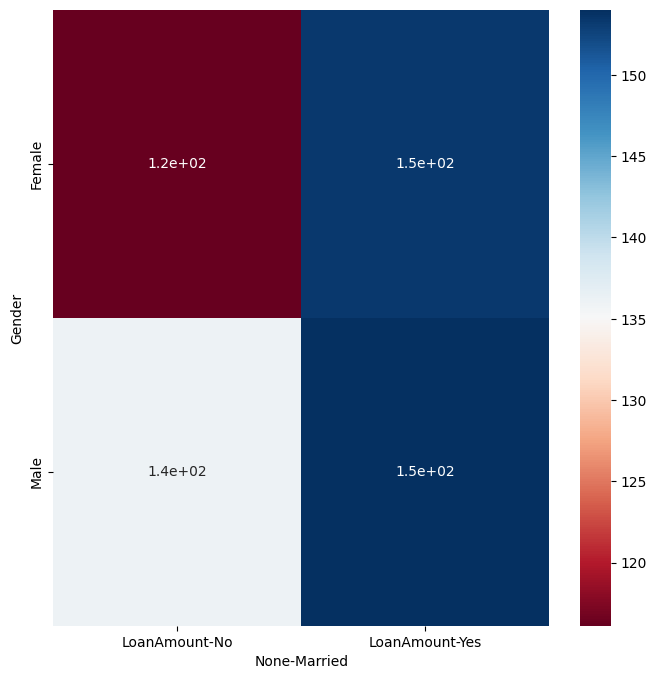

In [32]:
#to find correlation
#numerical features


plt.figure(figsize=(8,8)) #dont put more than 18
sns.heatmap(df2_pivot, annot=True, cmap='RdBu') #add value